# Frequency of Names


### ~~ Part 1 ~~

## Check out data and paths 

In [133]:
import pandas as pd
import numpy as np
import os

### Set a path as a string.       

In [134]:
# Checking out one particular year / file
path1880 = '../datasets/babynames/yob1880.txt'

### Pandas' read_csv()
Takes a path, column headers can be set here. The files don't have a one.

In [135]:
# Creates an ordinary dataframe
names1880 = pd.read_csv(path1880, names=['name','sex','births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [136]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

## Concanate all files into a DataFrame

In [137]:
# Combine all years (files) in one dataframe
years = range(1880, 2011) #excludes 2011
blobs = []
columns = ['name','sex','births']

for i in years:
    path = '../datasets/babynames/yob%d.txt' % i
    frame = pd.read_csv(path, names=columns)
    frame['year'] = i
    blobs.append(frame)

In [138]:
#print('LAST FRAME:' '\n', frame)
#print('ALL BLOBS:' '\n', blobs)

In [139]:
names = pd.concat(blobs, ignore_index = True)

In [140]:
names


,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


## Explore the data

### pivot_table() 
* creates spreadsheet like dataframes including aggregation functions. 

In [141]:
names.tail()

,name,sex,births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


In [142]:
# Whats the total birth rate per year
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


### Panda objects have plot() method 
* explore matlab plt later

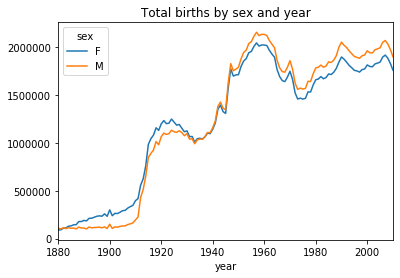

In [143]:
# Plot may work only the second time, probs with jupyther server?
total_births.plot(title='Total births by sex and year')

## Add data to a data frame using 'group operations'

In [144]:
# Insert column 'proportion' with fraction of babies. e.g. proportion == 0.02 means 2 out of 100 have that name/
def add_proportion(group):
    #Integer division floors
    births = group.births.astype(float)
    group['proportion'] = births / births.sum()
    return group

# Then add this column to the dataset
names = names.groupby(['year', 'sex']).apply(add_proportion)

In [145]:
names

,name,sex,births,year,proportion
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [146]:
# Sanity check, observe how 'proportion' is just another object
np.allclose(names.groupby(['year', 'sex']).proportion.sum(), 1)

True

In [147]:
# Get the top 1000 names for each sex/year combination
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_index(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)


In [148]:
top1000

,name,sex,births,year,proportion
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


## Analyzing naming trends

In [149]:
# Split the top1000 into boys / girls
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [150]:
# checking
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)
#total_births

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12c8c8350>,
      dtype=object)

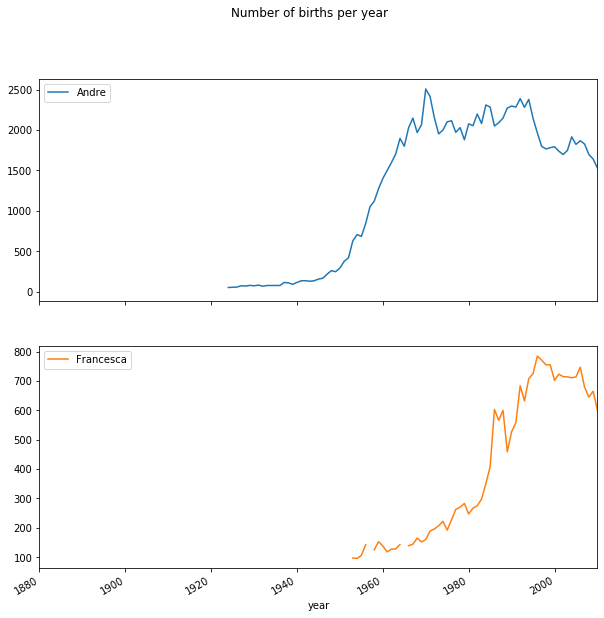

In [151]:
#Create a subset dataframe with names of interest
subset = total_births[['Andre', 'Francesca']]
subset.plot(subplots=True, figsize=(10, 10), grid=False, title="Number of births per year")

## Explore naming diversity

In [152]:
# Let's create a pivot table with the following groups (columns)
table = top1000.pivot_table('proportion', index='year', columns='sex', aggfunc=sum)
table.head()

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539


Diversity increases over time: 



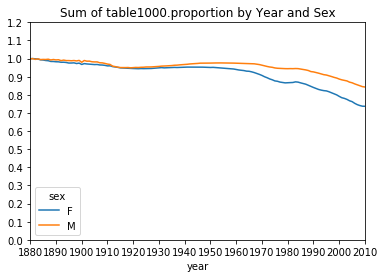

In [153]:
# Basic plot
# table.plot(title='Sum of table1000.proportion by Year and Sex')
table.plot(title='Sum of table1000.proportion by Year and Sex', yticks=np.linspace(0,1.2,13), xticks=range(1880,2020, 10))

print('Diversity increases over time: \n')

In [154]:
boys.head()

,name,sex,births,year,proportion
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392


### Number of distinct names in top 50% births

In [155]:
df_boys_2010 = boys[boys.year == 2010]
df_boys_2010

,name,sex,births,year,proportion
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [156]:
prop_cum_sum = df_boys_2010.sort_index(by='proportion', ascending=False).proportion.cumsum()
prop_cum_sum[:10]   

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: proportion, dtype: float64

In [157]:
prop_cum_sum.searchsorted(.5)

116

In [158]:
# Compare this distribution of names in 1900
df_boys_1900 = boys[boys.year == 1900]
prop_cum_sum = df_boys_1900.sort_index(by='proportion', ascending=False).proportion.cumsum() 
prop_cum_sum.searchsorted(.5)

24

In [159]:
# Apply the above to each year
def get_quantile_count(group, q=.5):
    group = group.sort_index(by='proportion', ascending=False)
    return group.proportion.cumsum().searchsorted(q)

In [160]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()

sex,F,M
year,,
1880,37,13
1881,37,13
1882,37,14
1883,38,14
1884,38,15


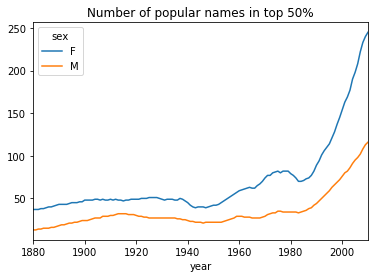

In [161]:
diversity.plot(title='Number of popular names in top 50%')

### ~~ End part 1 ~~ 


In [162]:
# Aggregate all the births in the entire data set by year, sex, final letter
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
last_letters


0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: last_letter, Length: 1690784, dtype: object